 ## Import useful modules ⬇️⬇️ and Global params

In [1]:
!pip install import-ipynb -q

In [2]:
!pip install ipynb --upgrade -q

In [3]:
!pip install plotly -q

In [4]:
!pip install -U kaleido -q

In [5]:
!pip install mlxtend -q

In [6]:
# **************************************************************************************************

In [7]:
# Generic librairies 
import os

import pandas as pd
pd.options.display.max_columns=None
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Visualization librairies 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe" 

import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning librairies
# split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Regressors
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# model selection
from sklearn.model_selection import cross_val_score, GridSearchCV

# feature selection
from sklearn.feature_selection import f_regression

# score metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# predefined modules
import import_ipynb
from ipynb.fs.full.MyFunctions import MyFunct, Status


# Global parameters 
'''
import sys
sys.path.append(".")
'''

filepath = 'src/Walmart_Store_sales.csv'

if not os.path.exists("images"):
    os.mkdir("images")

if not os.path.exists("output"):
    os.mkdir("output")

In [8]:
with open("output/out.txt", "a") as f:
    f.write(f'{os.listdir()}\n')

 ## File reading

In [9]:
print("Loading dataset...")
dataset = pd.read_csv(filepath)
print("...Done.")
print()

Loading dataset...
...Done.



# Part 1 : EDA and data preprocessing

In [10]:
MyFunct.explore(dataset)

Shape : (150, 8)

data types : 
Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Distinct values: 


Store            20
Date             86
Weekly_Sales    137
Holiday_Flag      3
Temperature     131
Fuel_Price      121
CPI             136
Unemployment    105
dtype: int64

## Unique 

In [11]:
Cols = ['Holiday_Flag', 'Store', 'Date']
MyFunct.unique_count(dataset, Cols)

unique values of Holiday_Flag:


0.0    127
NaN     12
1.0     11
Name: Holiday_Flag, dtype: int64

unique values of Store:


3.0     15
1.0     11
18.0    10
13.0     9
19.0     9
5.0      9
14.0     9
8.0      8
17.0     8
2.0      8
7.0      8
20.0     7
4.0      7
6.0      7
12.0     5
10.0     5
15.0     4
9.0      4
16.0     4
11.0     3
Name: Store, dtype: int64

unique values of Date:


NaN           18
07-01-2011     4
19-10-2012     4
30-07-2010     3
25-03-2011     3
              ..
24-06-2011     1
01-10-2010     1
18-05-2012     1
06-01-2012     1
19-11-2010     1
Name: Date, Length: 86, dtype: int64

## Missing 

In [12]:
print("Missing values over 150 observations: ")
MyFunct.missing(dataset)

Missing values over 150 observations: 


,Variable,n_missing,p_missing
0,Store,0,0.00
3,Holiday_Flag,12,8.00
6,CPI,12,8.00
2,Weekly_Sales,14,9.33
5,Fuel_Price,14,9.33
7,Unemployment,15,10.00
1,Date,18,12.00
4,Temperature,18,12.00


## Duplicates 

In [13]:
print("Duplicates over 150 observations: ")
MyFunct.duplicates_count(dataset)

Duplicates over 150 observations: 
No duplicated rows found


## Extract relevant data from Date variable

In [14]:
# date = (year, month, week, day, day of the week)

dataset['Year']    = dataset['Date'].apply(lambda d: MyFunct.get_year(str(d)))
dataset['Month']   = dataset['Date'].apply(lambda d: MyFunct.get_month(str(d)))
dataset['Week']    = dataset['Date'].apply(lambda d: MyFunct.get_week(str(d)))
dataset['Day']     = dataset['Date'].apply(lambda d: MyFunct.get_day(str(d)))
dataset['Weekday'] = dataset['Date'].apply(lambda d: MyFunct.get_weekday(str(d)))
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Weekday
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,7.0,18.0,4.0
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,12.0,25.0,4.0
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936,2012.0,7.0,30.0,27.0,4.0
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN,NaN
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,21.0,28.0,4.0


In [15]:
Cols = ['Year', 'Month', 'Week', 'Day', 'Weekday']
MyFunct.unique_count(dataset, Cols)

unique values of Year:


2010.0    54
2011.0    43
2012.0    35
NaN       18
Name: Year, dtype: int64

unique values of Month:


NaN     18
5.0     15
7.0     15
6.0     14
2.0     12
8.0     11
3.0     11
9.0     10
4.0     10
12.0    10
10.0     9
11.0     8
1.0      7
Name: Month, dtype: int64

unique values of Week:


NaN     18
30.0     6
21.0     6
25.0     6
1.0      5
12.0     5
38.0     4
49.0     4
19.0     4
50.0     4
34.0     4
6.0      4
45.0     4
27.0     4
7.0      4
42.0     4
15.0     3
46.0     3
41.0     3
22.0     3
11.0     3
17.0     3
18.0     3
16.0     3
24.0     3
36.0     3
32.0     3
52.0     2
23.0     2
5.0      2
29.0     2
13.0     2
37.0     2
8.0      2
26.0     2
31.0     2
33.0     2
20.0     2
47.0     1
3.0      1
9.0      1
10.0     1
39.0     1
28.0     1
2.0      1
35.0     1
40.0     1
Name: Week, dtype: int64

unique values of Day:


NaN     18
12.0    11
19.0     8
30.0     7
25.0     7
10.0     7
18.0     7
7.0      7
16.0     6
27.0     6
26.0     6
22.0     5
6.0      5
20.0     5
17.0     4
24.0     4
13.0     4
2.0      4
15.0     3
9.0      3
28.0     3
3.0      3
11.0     3
5.0      2
1.0      2
29.0     2
14.0     2
4.0      2
23.0     2
31.0     1
8.0      1
Name: Day, dtype: int64

unique values of Weekday:


4.0    132
NaN     18
Name: Weekday, dtype: int64

In [16]:
mask = dataset['Holiday_Flag'] == 1
dataset[mask][['Date', 'Weekly_Sales','Week']].sort_values(by='Date')

,Date,Weekly_Sales,Week
71,07-09-2012,NaN,36.0
122,07-09-2012,597876.55,36.0
32,10-02-2012,563460.77,6.0
33,10-02-2012,2077256.24,6.0
135,10-09-2010,903119.03,36.0
44,12-02-2010,1641957.44,6.0
107,12-02-2010,994801.40,6.0
114,26-11-2010,1757242.51,47.0
31,30-12-2011,NaN,52.0
110,31-12-2010,1799737.79,52.0


In [17]:
'''
title = 'Pair grid'
sns.pairplot(dataset)
plt.savefig("images/"+title+".png")
'''

'\ntitle = \'Pair grid\'\nsns.pairplot(dataset)\nplt.savefig("images/"+title+".png")\n'

## Univariate Analysis
Outliers / Anomalies detection (Box plots)

In [18]:
title = 'Distribution of the different quantitative variables(1)'
fig = make_subplots(rows=2, cols=3)

fig.add_trace(MyFunct.my_box_plotter(dataset['Weekly_Sales']), row=1, col=1)
fig.add_trace(MyFunct.my_box_plotter(dataset['CPI']), row=1, col=2)
fig.add_trace(MyFunct.my_box_plotter(dataset['Fuel_Price']), row=1, col=3)

fig.add_trace(MyFunct.my_box_plotter(dataset['Unemployment']), row=2, col=1)
fig.add_trace(MyFunct.my_box_plotter(dataset['Temperature']), row=2, col=2)

fig.update_layout(
    title= title, title_x = 0.5,
    showlegend=False
)

fig.to_image(format="png", engine="kaleido")
if os.path.exists("images/"+title+".png"):
    os.remove("images/"+title+".png")
    
fig.write_image("images/"+title+".png")

fig.show()

In [19]:
title = 'Distribution of the different quantitative variables (2)'
fig = make_subplots(rows=2, cols=3)

fig.add_trace(MyFunct.my_hist_plotter(dataset['Weekly_Sales']), row=1, col=1)
fig.add_trace(MyFunct.my_hist_plotter(dataset['CPI']), row=1, col=2)
fig.add_trace(MyFunct.my_hist_plotter(dataset['Fuel_Price']), row=1, col=3)

fig.add_trace(MyFunct.my_hist_plotter(dataset['Unemployment']), row=2, col=1)
fig.add_trace(MyFunct.my_hist_plotter(dataset['Temperature']), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Weekly_Sales", row=1, col=1)
fig.update_xaxes(title_text="Consumer Price Index", row=1, col=2)
fig.update_xaxes(title_text="Fuel Price", row=1, col=3)
fig.update_xaxes(title_text="Unemployment Rate", row=2, col=1)
fig.update_xaxes(title_text="Temperature", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

fig.update_layout(
    title= title, title_x = 0.5,
    showlegend=False
)

fig.to_image(format="png", engine="kaleido")
if os.path.exists("images/"+title+".png"):
    os.remove("images/"+title+".png")
    
fig.write_image("images/"+title+".png")
fig.show() 

## Bivariate Analysis
try to discover any correlation

In [20]:
title = 'Dataset Exploring by Store'

sales_store = dataset.groupby(['Store']).agg({'Weekly_Sales':'mean'})
flow_store = dataset.groupby(['Store']).agg({'Week':'count'})
temp_store = dataset.groupby(['Store']).agg({'Temperature':'mean'})
fuel_store = dataset.groupby(['Store']).agg({'Fuel_Price':'mean'})
cpi_store = dataset.groupby(['Store']).agg({'CPI':'mean'})
unemp_store = dataset.groupby(['Store']).agg({'Unemployment':'mean'})
holiday_store = dataset.groupby(['Store']).agg({'Holiday_Flag':sum})


fig = make_subplots(rows=4, cols=2)

fig.add_trace(MyFunct.my_bar_plotter(sales_store.index, sales_store['Weekly_Sales'].values), row=1, col=1)
fig.add_trace(MyFunct.my_bar_plotter(flow_store.index, flow_store['Week'].values), row=1, col=2)
fig.add_trace(MyFunct.my_bar_plotter(temp_store.index, temp_store['Temperature'].values), row=2, col=1)
fig.add_trace(MyFunct.my_bar_plotter(fuel_store.index, fuel_store['Fuel_Price'].values), row=2, col=2)
fig.add_trace(MyFunct.my_bar_plotter(cpi_store.index, cpi_store['CPI'].values), row=3, col=1)
fig.add_trace(MyFunct.my_bar_plotter(unemp_store.index, unemp_store['Unemployment'].values), row=3, col=2)
fig.add_trace(MyFunct.my_bar_plotter(holiday_store.index, holiday_store['Holiday_Flag'].values), row=4, col=1)



fig.update_xaxes(title_text="Store", tick0 = 1, dtick=1, row=1, col=1)
fig.update_yaxes(title_text="Mean Weekly Sales", row=1, col=1)

fig.update_xaxes(title_text="Store", tick0 = 1, dtick=1, row=1, col=2)
fig.update_yaxes(title_text="number of flows", row=1, col=2)

fig.update_xaxes(title_text="Store", tick0 = 1, dtick=1, row=2, col=1)
fig.update_yaxes(title_text="Mean Temperature", row=2, col=1)

fig.update_xaxes(title_text="Store", tick0 = 1, dtick=1, row=2, col=2)
fig.update_yaxes(title_text="Mean Fuel_Price", row=2, col=2)

fig.update_xaxes(title_text="Store", tick0 = 1, dtick=1, row=3, col=1)
fig.update_yaxes(title_text="Mean CPI", row=3, col=1)

fig.update_xaxes(title_text="Store", tick0 = 1, dtick=1, row=3, col=2)
fig.update_yaxes(title_text="Mean Unemployment", row=3, col=2)

fig.update_xaxes(title_text="Store", tick0 = 1, dtick=1, row=4, col=1)
fig.update_yaxes(title_text="Sum Holidays", row=4, col=1)

fig.update_layout(
    title= title, title_x = 0.5,
    showlegend=False,
    autosize=False,
    width=900,
    height=900
)

fig.to_image(format="png", engine="kaleido")
if os.path.exists("images/"+title+".png"):
    os.remove("images/"+title+".png")
    
fig.write_image("images/"+title+".png")

fig.show()

In [21]:
title = 'Distribution of Weekly Sales wrt different quantitative variables'

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
)

# Add traces
fig.add_trace(MyFunct.my_scatter_plotter(dataset['CPI'], dataset['Weekly_Sales']), row=1, col=1)
fig.add_trace(MyFunct.my_scatter_plotter(dataset['Fuel_Price'], dataset['Weekly_Sales']), row=1, col=2)

fig.add_trace(MyFunct.my_scatter_plotter(dataset['Unemployment'], dataset['Weekly_Sales']), row=2, col=1)
fig.add_trace(MyFunct.my_scatter_plotter(dataset['Temperature'], dataset['Weekly_Sales']), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Consumer Price Index", row=1, col=1)
fig.update_xaxes(title_text="Fuel Price", row=1, col=2)
fig.update_xaxes(title_text="Unemployment Rate", row=2, col=1)
fig.update_xaxes(title_text="Temperature", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Weekly Sales", row=1, col=1)
fig.update_yaxes(title_text="Weekly Sales", row=2, col=1)

# Update title 
fig.update_layout(
    title= title, title_x = 0.5,
    showlegend=False
)

# Export to a png image
fig.to_image(format="png", engine="kaleido")
if os.path.exists("images/"+title+".png"):
    os.remove("images/"+title+".png")
    
fig.write_image("images/"+title+".png")

fig.show()

In [22]:
title = 'Weekly Sales per Year wrt Holiday_Flag'

weekly_sales = dataset.groupby(['Year','Week']).agg({'Weekly_Sales': 'mean', 'Holiday_Flag':'max' })

weekly_sales_10 = weekly_sales.loc[2010]
weekly_sales_11 = weekly_sales.loc[2011]
weekly_sales_12 = weekly_sales.loc[2012]

x10 = weekly_sales_10['Weekly_Sales'].index
y10 = weekly_sales_10['Weekly_Sales'].values

x11 = weekly_sales_11['Weekly_Sales'].index
y11 = weekly_sales_11['Weekly_Sales'].values

x12 = weekly_sales_12['Weekly_Sales'].index
y12 = weekly_sales_12['Weekly_Sales'].values

fig = go.Figure()
fig.add_trace(MyFunct.my_scatter_plotter_l(x10,y10,'2010', weekly_sales_10['Holiday_Flag']))
fig.add_trace(MyFunct.my_scatter_plotter_l(x11,y11,'2011', weekly_sales_11['Holiday_Flag']))
fig.add_trace(MyFunct.my_scatter_plotter_l(x12,y12,'2012', weekly_sales_12['Holiday_Flag']))

fig.update_layout( 
    title=title, title_x = 0.5,
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    autosize=False,
    width=900,
    height=500)

fig.update_xaxes(tickvals= np.arange(1, 53, step=1))

# Export to a png image
fig.to_image(format="svg", engine="kaleido")

if os.path.exists("images/"+title+".png"):
    os.remove("images/"+title+".png")
    
fig.write_image("images/"+title+".png")
#fig.write_html("images/"+title+".html")
fig.show()

In [23]:
title = 'Distribution of Weekly Sales wrt different categorical variables'
# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
)

# Add traces
fig.add_trace(MyFunct.my_scatter_plotter(dataset['Year'], dataset['Weekly_Sales']), row=1, col=1)
fig.add_trace(MyFunct.my_scatter_plotter(dataset['Store'], dataset['Weekly_Sales']), row=1, col=2)
fig.add_trace(MyFunct.my_scatter_plotter(dataset['Holiday_Flag'], dataset['Weekly_Sales']), row=2, col=1)
fig.add_trace(MyFunct.my_scatter_plotter(dataset['Week'], dataset['Weekly_Sales']), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Year", dtick =1, row=1, col=1)
fig.update_xaxes(title_text="Store", dtick =1, row=1, col=2)
fig.update_xaxes(title_text="Holiday_Flag", tickmode = 'array', tickvals = [0, 1], ticktext = ['No', 'Yes'], row=2, col=1)
fig.update_xaxes(title_text="Weekday", tick0 = 0, dtick=2, row=2, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="Weekly Sales", row=1, col=1)
fig.update_yaxes(title_text="Weekly Sales", row=2, col=1)
# Update title 
fig.update_layout(
    title= title, title_x = 0.5,
    showlegend=False
)

# Export to a png image
fig.to_image(format="png", engine="kaleido")
if os.path.exists("images/"+title+".png"):
    os.remove("images/"+title+".png")
    
fig.write_image("images/"+title+".png")

fig.show()

## Outliers

In [24]:
columns = ['Temperature', 'Fuel_Price', 'CPI' , 'Unemployment']
MyFunct.outliers_count(dataset, columns)

,Temperature,Fuel_Price,CPI,Unemployment
count,132.000000,136.000000,138.000000,135.000000
mean,61.398106,3.320853,179.898509,7.598430
std,18.378901,0.478149,40.274956,1.577173
low_fence,6.261404,1.886406,59.073640,2.866912
high_fence,116.534808,4.755300,300.723378,12.329947
outliers,0.000000,0.000000,0.000000,5.000000
count_after_drop,132.000000,136.000000,138.000000,130.000000


## Correlation

In [25]:
title = 'Correlation degrees between different variables'
MyFunct.my_heatmap(dataset, title)

## SUMMARY 

🗒 Note 1: the target variable🎯 has missing values, hence we should drop the related rows  
🗒 Note 2: drop outliers in the Unemployment rate data   
❗ Investigate: Discontinuity in the CPI data ??  
🗒 Note 5: year and fuel_price are highly correlated (0.81)  
🗒 Note 6: Date, Day, Weekday are not relevant, we may drop them  
🗒 Note 7: There is no much missing values but the distribution of data among different values of some variables (such as Holiday_flag) is highly skewed  
❗ Investigate: The fact that the week is a holiday_week does not affect the sales (at least in the current dataset) because of the low number of observations

In [26]:
selection_dict = {
  'Store': Status.SELECTED,
  'Date': Status.NOT_SELECTED,
  'Weekly_Sales': Status.SELECTED,
  'Holiday_Flag': Status.SELECTED,
  'Temperature': Status.SELECTED,
  'Fuel_Price': Status.SELECTED,
  'CPI': Status.SELECTED,  
  'Unemployment': Status.SELECTED,  
  'Year': Status.MAYBE,  
  'Month': Status.MAYBE,
  'Week': Status.SELECTED,
  'Day': Status.LATER,
  'Weekday': Status.NOT_SELECTED,
}
selection_df = pd.DataFrame.from_dict({k: v.value for k, v in selection_dict.items()},
                                      orient='index', columns=['status'])
selection_df

,status
Store,selected
Date,not selected
Weekly_Sales,selected
Holiday_Flag,selected
Temperature,selected
Fuel_Price,selected
CPI,selected
Unemployment,selected
Year,maybe
Month,maybe


## Preprocessing 

In [27]:
# drop observations where Weekly_Sales is missing (150 - 14 --> 136)
dataset = MyFunct.remove_missing(dataset, 'Weekly_Sales')

# drop Unemployment outliers ( 136 - 5 ---> 131)
dataset= MyFunct.remove_outlier(dataset, 'Unemployment')

# drop columns ['Date', 'Day', 'Weekday', 'Month', 'Year']
cols_drop = ['Date', 'Day', 'Weekday', 'Month', 'Year']
dataset = dataset.drop(cols_drop, axis = 'columns')

# Part 2 : Linear Regression Models

## Data Preparing for modeling

In [28]:
# Define target variable (y) and explanatory variables (X)
Y = dataset['Weekly_Sales']
X = dataset.drop('Weekly_Sales', axis = 'columns')

In [29]:
# Divide dataset (131 observations) Train (0.8 ~ 104) set & Test set (0.2 ~ 27)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Convert pandas DataFrames to numpy arrays before using scikit-learn
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

# Create pipeline for numeric features 
#Num_X =['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week'] 
num_X = [2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
#cat_X = ['Store', 'Holiday_Flag']
cat_X = [0,1]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Use ColumnTranformer to make a preprocessor object 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_X),
        ('cat', categorical_transformer, cat_X)
    ])

# Preprocessings on train set (24 cols = 5 for numerci columns + 1 for holiday_flag + 18 for store, store 12 is deleted with the outliers)
X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)

In [30]:
# categories and features'names
categories = preprocessor.transformers_[1][1].named_steps['encoder'].categories_
print(f'categories: {categories}')
features = preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names()
print(f'features: {features}')

categories: [array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 13., 14.,
       15., 16., 17., 18., 19., 20.]), array([0., 1.])]
features: ['x0_2.0' 'x0_3.0' 'x0_4.0' 'x0_5.0' 'x0_6.0' 'x0_7.0' 'x0_8.0' 'x0_9.0'
 'x0_10.0' 'x0_11.0' 'x0_13.0' 'x0_14.0' 'x0_15.0' 'x0_16.0' 'x0_17.0'
 'x0_18.0' 'x0_19.0' 'x0_20.0' 'x1_1.0']


## Dummy Regressor

In [31]:
dummy_regressor = DummyRegressor(strategy = 'mean')
dummy_regressor.fit(X_train, Y_train)

y_train_pred, y_test_pred= dummy_regressor.predict(X_train), dummy_regressor.predict(X_test)
mse_train, mse_test = mean_squared_error(Y_train,y_train_pred ), mean_squared_error(Y_test, y_test_pred)
r2_train, r2_test = r2_score(Y_train,y_train_pred), r2_score(Y_test, y_test_pred)
adjR2_train, adjR2_test = MyFunct.adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1]), MyFunct.adjusted_r2(r2_test, X_train.shape[0], X_train.shape[1]) 

iterables = [["RMSE", "R2", "ADJ R2"], ["Train", "Test"]]
ind = pd.MultiIndex.from_product(iterables)

metrics = pd.DataFrame(columns=['Dummy Regressor'], index = ind)
metrics['Dummy Regressor'] = [np.sqrt(mse_train), np.sqrt(mse_test), r2_train, r2_test, adjR2_train, adjR2_test]
metrics

Dummy Regressor
RMSE   Train    659983.460351
       Test     641738.369244
R2     Train         0.000000
       Test         -0.083984
ADJ R2 Train        -0.303797
       Test         -0.413295

## Linear Regression 

In [32]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

y_train_pred, y_test_pred= linear_regressor.predict(X_train), linear_regressor.predict(X_test)
mse_train, mse_test = mean_squared_error(Y_train,y_train_pred ), mean_squared_error(Y_test, y_test_pred)
r2_train, r2_test = r2_score(Y_train,y_train_pred), r2_score(Y_test, y_test_pred)
adjR2_train, adjR2_test = MyFunct.adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1]), MyFunct.adjusted_r2(r2_test, X_train.shape[0], X_train.shape[1]) 

# compute SS for the F_value computation
SST1, SSR1, SSE1 = MyFunct.sum_squares(Y_train, y_train_pred)

metrics['Linear Regressor'] = [np.sqrt(mse_train), np.sqrt(mse_test), r2_train, r2_test,adjR2_train, adjR2_test]
metrics

Dummy Regressor  Linear Regressor
RMSE   Train    659983.460351     111941.985206
       Test     641738.369244     160055.464015
R2     Train         0.000000          0.971231
       Test         -0.083984          0.932571
ADJ R2 Train        -0.303797          0.962491
       Test         -0.413295          0.912086

**Observation** The Dummy Regressor always predict the r2_ score as 0 since it is always predicting a constant (mean) without having an insight of the output. The Linear Regression Model seems to fit much better than the Dummy Regressor in terms of “mean squared error” and “r2_score”. 

## Ridge Regression 

<AxesSubplot:xlabel='param_alpha'>

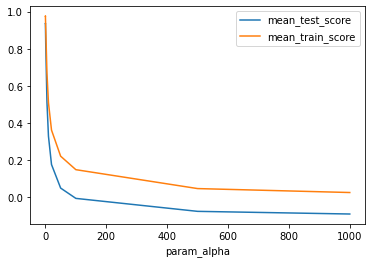

In [33]:
ridge = Ridge() 
params = {'alpha': [1e-20,1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 50, 100, 500, 1000]} 

grid = GridSearchCV(ridge, params, cv = 3, verbose = 0, return_train_score = True)
grid_fit = grid.fit(X_train, Y_train)

grid_results = pd.DataFrame(grid_fit.cv_results_)

grid_results.plot('param_alpha',y=['mean_test_score','mean_train_score'])

**Observation** As alpha moves away from 0, the diference between R2(train) and R2(test) gets larger and at some level it becomes constant while the performance of the model gets worse.  
Hence, the best alpha lies arround 0. 

In [34]:
best_ridge_estimator = grid_fit.best_estimator_
print(f' best estimator : {best_ridge_estimator}')

y_train_pred, y_test_pred= grid_fit.predict(X_train), grid_fit.predict(X_test)
mse_train, mse_test = mean_squared_error(Y_train,y_train_pred ), mean_squared_error(Y_test, y_test_pred)
r2_train, r2_test = r2_score(Y_train,y_train_pred), r2_score(Y_test, y_test_pred)
adjR2_train, adjR2_test = MyFunct.adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1]), MyFunct.adjusted_r2(r2_test, X_train.shape[0], X_train.shape[1]) 

metrics['Ridge Regressor'] = [np.sqrt(mse_train), np.sqrt(mse_test), r2_train, r2_test, adjR2_train, adjR2_test]
metrics

 best estimator : Ridge(alpha=1e-10)


Dummy Regressor  Linear Regressor  Ridge Regressor
RMSE   Train    659983.460351     111941.985206    111943.693307
       Test     641738.369244     160055.464015    159813.397029
R2     Train         0.000000          0.971231         0.971230
       Test         -0.083984          0.932571         0.932775
ADJ R2 Train        -0.303797          0.962491         0.962490
       Test         -0.413295          0.912086         0.912352

## Lasso Regression 

<AxesSubplot:xlabel='param_alpha'>

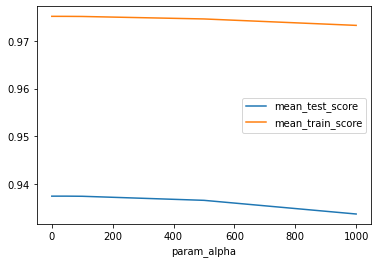

In [35]:
lasso = Lasso() 
params = {'alpha': [1e-20,1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,50,100, 500, 1000]} 

grid = GridSearchCV(lasso, params, cv = 3, verbose = 0, return_train_score = True)
grid_fit = grid.fit(X_train, Y_train)

grid_results = pd.DataFrame(grid_fit.cv_results_)
grid_results.plot('param_alpha',y=['mean_test_score','mean_train_score'])

**Observation** with the lasso, we don't see any significant improvement in the scores.  
It doesn't matter how alpha gets larger, the difference between R2(train) and R2(test) is approximately constant

In [36]:
best_lasso_estimator = grid_fit.best_estimator_
print(f' best estimator : {best_lasso_estimator}')

y_train_pred, y_test_pred= grid_fit.predict(X_train), grid_fit.predict(X_test)
mse_train, mse_test = mean_squared_error(Y_train,y_train_pred ), mean_squared_error(Y_test, y_test_pred)
r2_train, r2_test = r2_score(Y_train,y_train_pred), r2_score(Y_test, y_test_pred)
adjR2_train, adjR2_test = MyFunct.adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1]), MyFunct.adjusted_r2(r2_test, X_train.shape[0], X_train.shape[1]) 

metrics['Lasso Regressor'] = [np.sqrt(mse_train), np.sqrt(mse_test), r2_train, r2_test, adjR2_train, adjR2_test ]
metrics

 best estimator : Lasso(alpha=20)


Dummy Regressor  Linear Regressor  Ridge Regressor  \
RMSE   Train    659983.460351     111941.985206    111943.693307   
       Test     641738.369244     160055.464015    159813.397029   
R2     Train         0.000000          0.971231         0.971230   
       Test         -0.083984          0.932571         0.932775   
ADJ R2 Train        -0.303797          0.962491         0.962490   
       Test         -0.413295          0.912086         0.912352   

              Lasso Regressor  
RMSE   Train    111943.751279  
       Test     159517.099819  
R2     Train         0.971230  
       Test          0.933024  
ADJ R2 Train         0.962490  
       Test          0.912676

<AxesSubplot:xlabel='RMSE'>

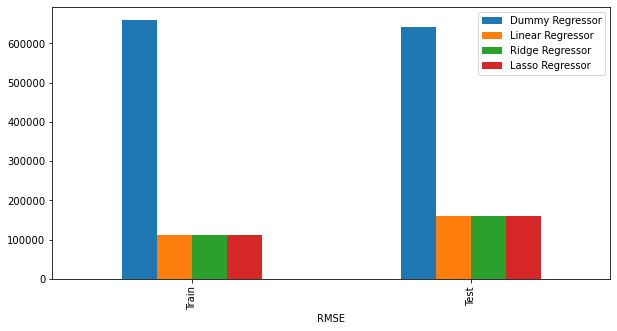

In [37]:
metrics.loc['RMSE'].plot(kind='bar', xlabel='RMSE', figsize=(10,5))

<AxesSubplot:xlabel='R2'>

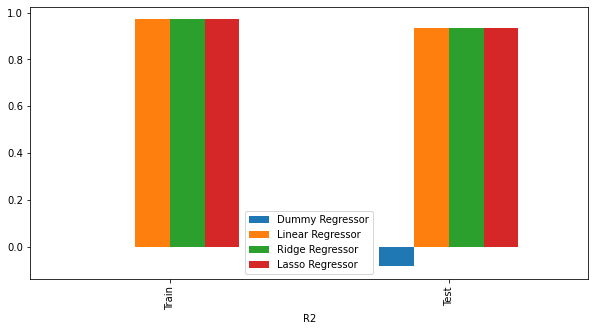

In [38]:
metrics.loc['R2'].plot(kind='bar', xlabel='R2', figsize=(10,5))

**Conclusion** : there is no difference between the unregularized Linear regression model (alpha =0) and the regularized linear regression models

## Features Coefficients

In [39]:
coef = pd.DataFrame()
coef['feature'] = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week'] + ['Store_%d'%i for i in range(2,12)]+['Store_%d'%i for i in range(13,21)]+ ['Holiday_Flag']

coef['coef_linear_regressor'] = linear_regressor.coef_
coef['coef_linear_regressor'] = coef.coef_linear_regressor.abs()
coef = coef.sort_values(by = 'coef_linear_regressor', ascending = True)

px.bar(coef, x ='coef_linear_regressor', y = 'feature')

# Feature Engineering (Not a big deal !!)

In [40]:
flow_store = dataset.groupby(['Store']).agg({'Week':'count'})
flow_store_df=pd.DataFrame(columns=['Store', 'flow'])
flow_store_df['Store'] = flow_store.Week.index
flow_store_df['flow'] = flow_store.Week.tolist()

In [41]:
dataset = pd.merge(dataset, flow_store_df, on='Store')
dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,flow
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,7.0,6
1,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,21.0,6
2,6.0,1498080.16,NaN,68.91,2.780,211.894272,7.092,17.0,6
3,6.0,1420405.41,0.0,NaN,3.523,217.270654,6.925,34.0,6
4,6.0,1532308.78,0.0,NaN,2.640,212.894485,6.973,30.0,6
...,...,...,...,...,...,...,...,...,...
126,10.0,1805999.79,0.0,86.87,3.666,130.719633,7.170,27.0,3
127,10.0,1990371.02,0.0,57.62,3.882,130.645793,7.545,9.0,3
128,10.0,1714309.90,NaN,43.43,3.287,127.191774,8.744,NaN,3
129,10.0,1768172.31,0.0,90.32,NaN,126.126600,9.524,25.0,3


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

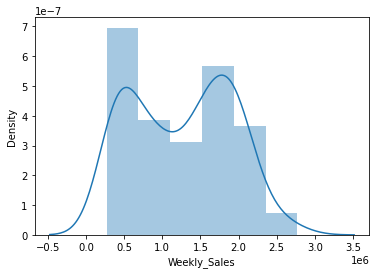

In [42]:
sns.distplot(dataset['Weekly_Sales'])

In [43]:
# change the scale using the log function so the distribution becomes evenly distributed.
dataset['Weekly_Sales'] = np.log10(dataset['Weekly_Sales'] )

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

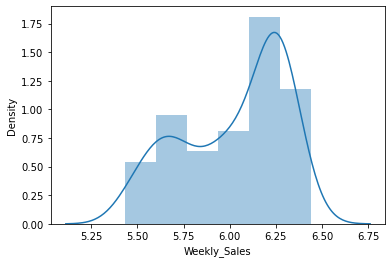

In [44]:
sns.distplot(dataset['Weekly_Sales'])

In [45]:
# Define target variable (y) and explanatory variables (X)
Y = dataset['Weekly_Sales']
X = dataset.drop('Weekly_Sales', axis = 'columns')

# Divide dataset (131 observations) Train (0.8 ~ 104) set & Test set (0.2 ~ 27)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Convert pandas DataFrames to numpy arrays before using scikit-learn
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

# Create pipeline for numeric features 
#Num_X =['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'flow'] 
num_X = [2,3,4,5,6,7]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
#cat_X = ['Store', 'Holiday_Flag']
cat_X = [0,1]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Use ColumnTranformer to make a preprocessor object 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_X),
        ('cat', categorical_transformer, cat_X)
    ])

# Preprocessings on train set (24 cols = 5 for numerci columns + 1 for holiday_flag + 18 for store, store 12 is deleted with the outliers)
X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)

## Linear Regression (Model 2 with the new variable 'flow' and pre_scaled 'Weekly_Sales')

In [46]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

y_train_pred, y_test_pred= linear_regressor.predict(X_train), linear_regressor.predict(X_test)
mse_train, mse_test = mean_squared_error(Y_train,y_train_pred ), mean_squared_error(Y_test, y_test_pred)
r2_train, r2_test = r2_score(Y_train,y_train_pred), r2_score(Y_test, y_test_pred)
adjR2_train, adjR2_test = MyFunct.adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1]), MyFunct.adjusted_r2(r2_test, X_train.shape[0], X_train.shape[1]) 

#compute SS for F_value Computation
SST2, SSR2, SSE2 = MyFunct.sum_squares(Y_train, y_train_pred)

metrics['Linear Regressor 2'] = [np.sqrt(mse_train), np.sqrt(mse_test), r2_train, r2_test, adjR2_train, adjR2_test]
metrics

Dummy Regressor  Linear Regressor  Ridge Regressor  \
RMSE   Train    659983.460351     111941.985206    111943.693307   
       Test     641738.369244     160055.464015    159813.397029   
R2     Train         0.000000          0.971231         0.971230   
       Test         -0.083984          0.932571         0.932775   
ADJ R2 Train        -0.303797          0.962491         0.962490   
       Test         -0.413295          0.912086         0.912352   

              Lasso Regressor  Linear Regressor 2  
RMSE   Train    111943.751279            0.032349  
       Test     159517.099819            0.048325  
R2     Train         0.971230            0.985914  
       Test          0.933024            0.974315  
ADJ R2 Train         0.962490            0.981399  
       Test          0.912676            0.966083

As we can see, the second linear model performs better than the first linear model.  
Even the gap between train and test scores is decreased

# Notes for Further Investigation